## Часть 1: Исследование данных


Статья, по мотивам которой строится проект: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

### Данные

Исходные данные для статьи [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) находятся в свободном доступе по следующей ссылке на github: https://github.com/fivethirtyeight/data. Это два csv-файла. В одном файле данные о рейтингах от компании Fandango, а в другом файле агрегированные данные о рейтингах от других компаний, таких как Metacritic, IMDB и Rotten Tomatoes.

#### all_sites_scores.csv

-----

Файл `all_sites_scores.csv` содержит все фильмы, для которых есть рейтинг Rotten Tomatoes, рейтинг RT User, оценка Metacritic, оценка Metacritic User и оценка IMDb, а также как минимум 30 отзывов от фанатов на Fandango. Данные Fandango были выгружены 24 августа 2015.

Колонка | Определение
--- | -----------
FILM | Название фильма
RottenTomatoes | Оценка "Rotten Tomatoes Tomatometer" для этого фильма
RottenTomatoes_User | Оценка "Rotten Tomatoes user" для этого фильма
Metacritic | Оценка "Metacritic" для этого фильма
Metacritic_User | Оценка "Metacritic user" для этого фильма
IMDB | Оценка "IMDb user" для этого фильма
Metacritic_user_vote_count | Количество голосов за этот фильм от пользователей Metacritic
IMDB_user_vote_count | Количество голосов за этот фильм от пользователей IMDb

#### fandango_scape.csv

Фильм `fandango_scrape.csv` содержит данные о фильмах, которые авторы статьи выгрузили с Fandango.

Колонка | Определение
--- | ---------
FILM | Название фильма
STARS | Количество звёзд на Fandango.com
RATING |  Рейтинг Fandango - значение, прочитанное с HTML-страницы. Это средний рейтинг фильма.
VOTES | Количество голосов пользователей, которые написали отзыв о фильме (на момент выгрузки данных).

**Импорт библиотек:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Часть 2: Сравнивание рейтингов Fandango и другие пользовательских рейтингов



**Загрузка файла fandango_scrape.csv**

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Связь между популярностью фильма и его рейтингом - график scatterplot, показывающий связь между колонками RATING и VOTES:**

<Axes: xlabel='RATING', ylabel='VOTES'>

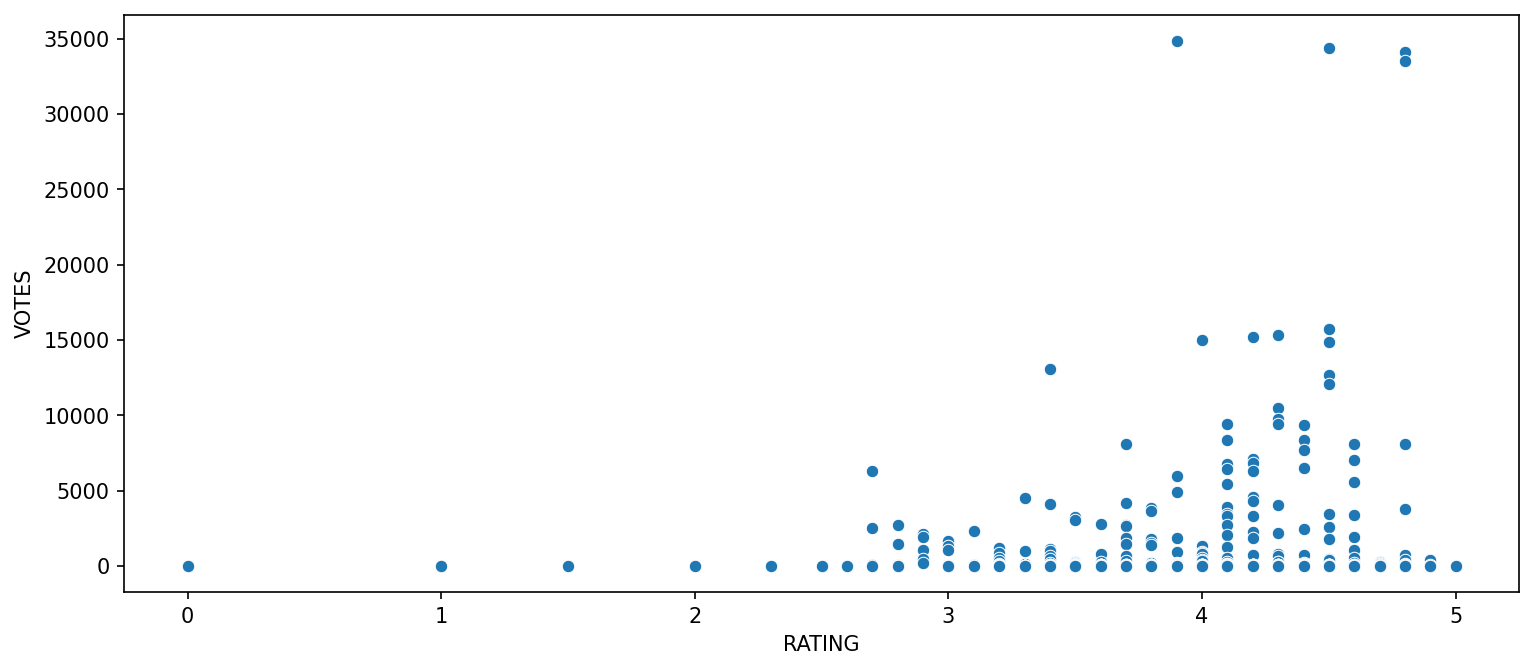

In [6]:
plt.figure(figsize=(12,5), dpi=150)
sns.scatterplot(x=fandango['RATING'], y=fandango['VOTES'], data=fandango)

**Вычисление корреляции между колонками:**

In [7]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Предполагаем, что каждая строка в колонке FILM содержит значение в следующем формате:**

    Название Фильма (Год)
    
**Отделение года из название фильмаЮ и добавления новой колонки:**

In [8]:
fandango['YEAR'] = fandango['FILM'].str.split().str[-1].str[1:5]
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


**Количество фильмов, которые содержатся в наборе данных Fandango, в разбивке по годам:**

In [9]:
fcount= fandango[['FILM', 'YEAR']].groupby('YEAR').count().sort_values(by='FILM', ascending=False)
fcount

,FILM
YEAR,
2015,478
2014,23
1964,1
2012,1
2016,1


**Визуализация количества фильмов в год с помощью графика:**

<Axes: xlabel='YEAR', ylabel='count'>

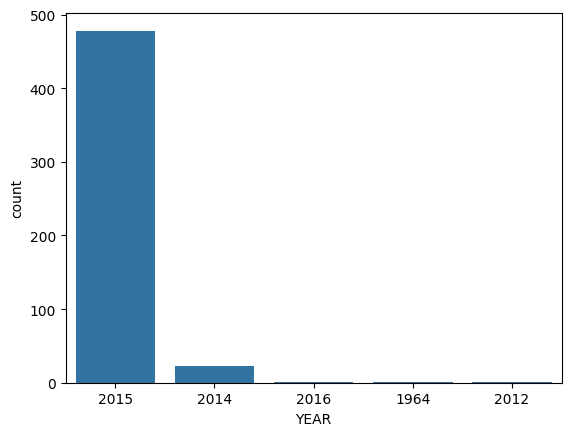

In [10]:
sns.countplot(x='YEAR',data=fandango)

**10 фильмов, получивших наибольшее количество голосов (votes):**

In [11]:
fandango.sort_values(by='VOTES', ascending=False).iloc[0:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Количество фильмов, котороне имеет нулевое количество голосов (votes):**

In [12]:
fandango[fandango['VOTES']==0]['VOTES'].count()

69

**Создание DataFrame только с теми фильмами, которые имеют голоса (votes):**

In [13]:
fand_votes = fandango[fandango['VOTES']!=0]
fand_votes

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


**Создание графика KDE plot (или несколько таких графиков), который отображает распределение отображаемых рейтингов (STARS) и истинных рейтингов на основе голосов пользователей (RATING):**

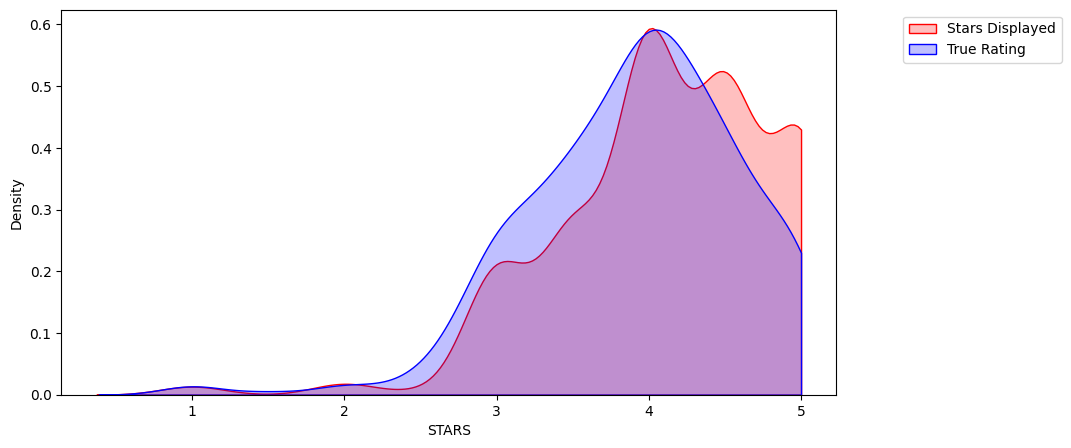

In [14]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=fand_votes, x='STARS', color='red', fill=True, label='Stars Displayed', clip=[0,5])
sns.kdeplot(data=fand_votes, x='RATING', color='blue', fill=True, label='True Rating', clip=[0,5])
plt.legend(bbox_to_anchor=(1.3, 1))

**Сохранение разницы между колонками STARS и RATING в новой колонке:**

In [15]:
fand_votes['STARS_DIFF'] = round(fand_votes['STARS'] - fand_votes['RATING'], 1)
fand_votes

/tmp/ipykernel_7601/3993169172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fand_votes['STARS_DIFF'] = round(fand_votes['STARS'] - fand_votes['RATING'], 1)


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**График count plot для отображения того, сколько раз встречается то или иное значение разницы между STAR и RATING:**

<Axes: xlabel='STARS_DIFF', ylabel='count'>

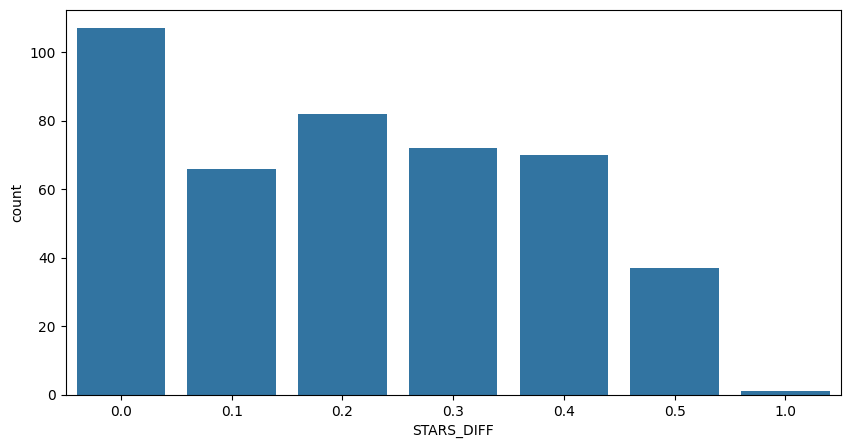

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='STARS_DIFF', data=fand_votes)

**Поиск фильма с разницей в одну звезду:**

In [17]:
fand_votes[fand_votes['STARS_DIFF']==1.0]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Часть 3: Сравнение рейтингов Fandango с рейтингами других компаний

Как рейтинги Fandango соотносятся с рейтингами других компаний?

**Загрузка файла "all_sites_scores.csv"**

In [18]:
all_sites = pd.read_csv("all_sites_scores.csv")

**Изучение общих свойств полученного объекта DataFrame:**

In [19]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [20]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [21]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Рейтинги от Rotten Tomatoes
Здесь два набора рейтингов - рейтинги, опубликованные официальными критиками, и пользовательские рейтинги. 

**График scatterplot, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами.**

(0.0, 100.0)

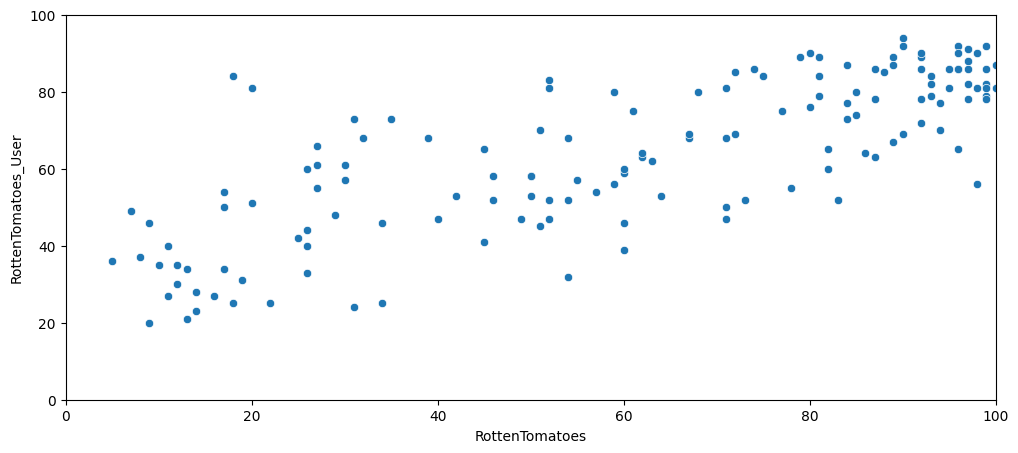

In [22]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='RottenTomatoes', y='RottenTomatoes_User', data=all_sites)
plt.xlim(0,100)
plt.ylim(0,100)

**Создание новой колонки, в которой сохраните разницу между рейтингом от критиков и пользовательским рейтингом для Rotten Tomatoes. Используйте формулу RottenTomatoes-RottenTomatoes_User:**

In [23]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

Теперь давайте посчитаем среднее значение полученной разницы по всему набору данных. Поскольку разница может быть как положительной, так и отрицательной, то давайте сначала возьмём абсолютные величины всех значений, и только после этого посчитаем среднее значение. Таким образом мы получим среднее значение абсолютной разницы между рейтингами от критиков и пользовательскими рейтингами.

**Вычисление средней абсолютной разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes, согласно описанию выше:**

In [24]:
all_sites["Rotten_Diff"].apply(abs).mean()

15.095890410958905

**График распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes. На этом графике будут отрицательные значения:**

<Figure size 1000x400 with 0 Axes>

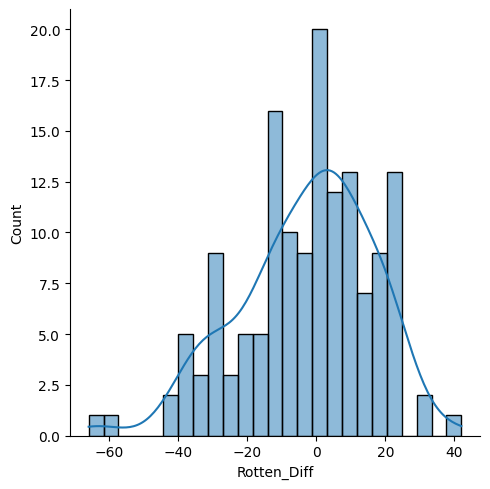

In [25]:
plt.figure(figsize=(10,4))
sns.displot(data=all_sites, x='Rotten_Diff', kde=True, bins=25)
plt.show()

**График распределения *абсолютных значений* разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes:**

<Figure size 1000x400 with 0 Axes>

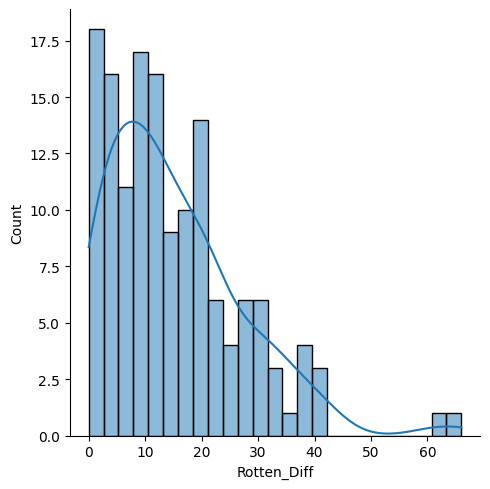

In [26]:
plt.figure(figsize=(10,4))
sns.displot(data=all_sites["Rotten_Diff"].apply(abs), kde=True, bins=25)
plt.show()

**Давайте выясним, какие фильмы наиболее отличаются по рейтингам. Сначала выведите 5 фильмов с наибольшей по модулю *отрицательной* разницей рейтингов. Поскольку мы вычисляли разницу рейтингов по формуле Critics Rating - Users Rating, большие по модулю отрицательные значения говорят о том, что пользователи в среднем оценили эти фильмы намного выше, чем критики.**

**5 фильмов в среднем были выше всего оценены пользователями, по сравнению с оценками от критиков:**

In [27]:
all_sites[["FILM", "Rotten_Diff"]].sort_values(['Rotten_Diff']).iloc[0:5]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**5 фильмов, которые в среднем были выше всего оценены критиками, по сравнению с оценками от пользователей:**

In [28]:
all_sites[["FILM", "Rotten_Diff"]].sort_values(['Rotten_Diff'], ascending=False).iloc[0:5]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## Рейтинги от MetaCritic

Далее давайте быстро взглянем на рейтинги от MetaCritic. Они тоже отображают два типа рейтингов - как свои официальные рейтинги, так и пользовательские рейтинги.

**График scatterplot для сравнения рейтингов Metacritic и Metacritic User:**

(0.0, 10.0)

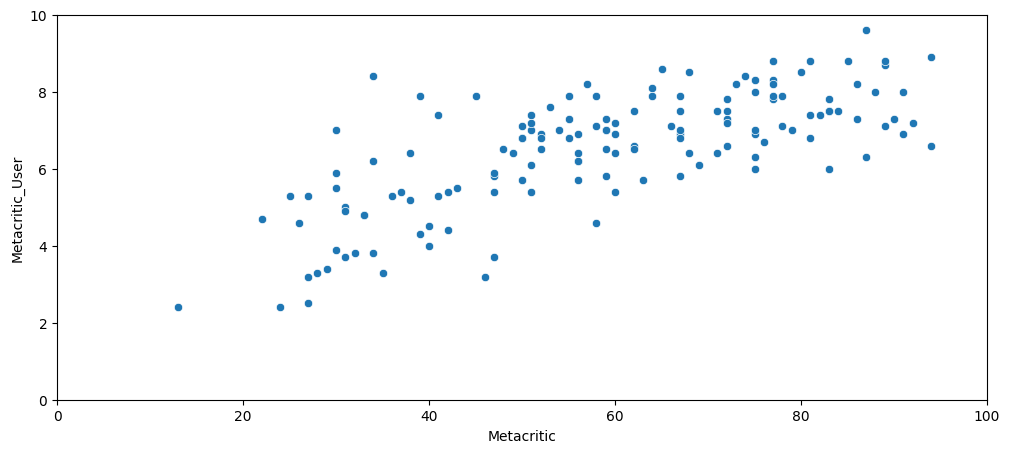

In [29]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Metacritic', y='Metacritic_User', data=all_sites)
plt.xlim(0,100)
plt.ylim(0,10)

## Рейтинги от IMDB

И наконец, посмотрим на рейтинги от IMDB. Обратите внимание, что Metacritic и IMDB показывают количество голосов. Посмотрим на наиболее популярные фильмы.

**График scatterplot для изображения связи между количеством голосов на MetaCritic и количеством голосов на IMDB.**

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

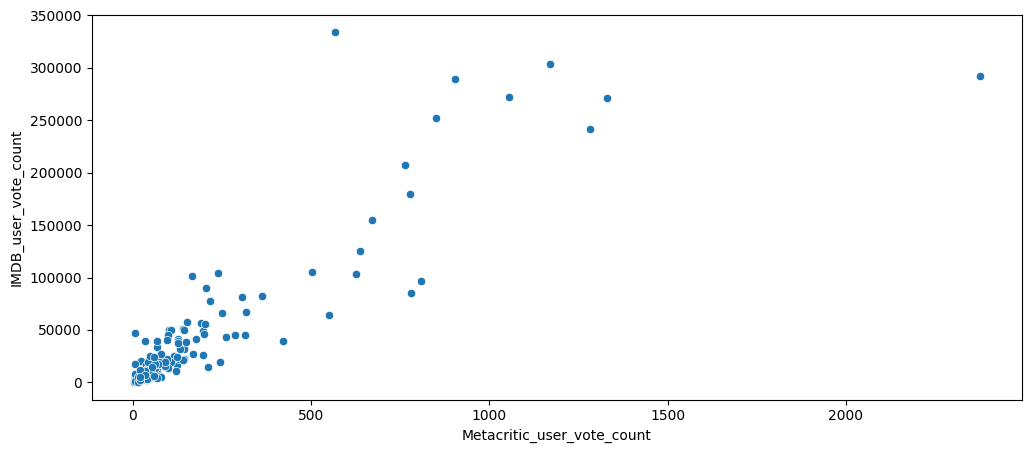

In [30]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Metacritic_user_vote_count', y='IMDB_user_vote_count', data=all_sites)
# plt.xlim(0,100)
# plt.ylim(0,10)

**Фильм, который получил наибольшее количество голосов на IMDB:**

In [31]:
all_sites[all_sites.IMDB_user_vote_count == all_sites.IMDB_user_vote_count.max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Фильм, который получил наибольшее количество голосов на Metacritic:**

In [32]:
all_sites[all_sites.Metacritic_user_vote_count == all_sites.Metacritic_user_vote_count.max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Сравнение рейтингов Fandango с рейтингами других компаний

Давайте наконец выясним, являлись ли рейтинги Fandango искусственно завышенными, чтобы продавать больше билетов.

**Объединение таблицы fandango с таблицей all_sites ("*inner* merge"):**

In [33]:
sum_table = fandango.merge(all_sites, how='inner', on='FILM')
sum_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [34]:
sum_table.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Нормализация колонок до диапазона 0-5 в соответствии с колонками STARS и RATINGS от Fandango

Обратите внимание, что компании Rotten Tomatoes, Metacritic и IMDB используют другую шкалу измерения рейтингов, чем шкала от 0 до 5 звезд в Fandango. Чтобы выполнить сравнения, нам нужно *нормализовать* эти значения, чтобы они попадали с диапазон от 0 до 5 звёзд.
**Добавление дополнительных колонок в all_sites, и запись в них нормализованных значений рейтингов от 0 до 5:**

In [35]:
sum_table['RT_norm'] = round(sum_table['RottenTomatoes'] / 20, 1)
sum_table['RTU_norm'] = round(sum_table['RottenTomatoes_User'] / 20, 1)
sum_table['Meta_norm'] = round(sum_table['Metacritic'] / 20, 1)
sum_table['MetaU_norm'] = round(sum_table['Metacritic_User'] / 2, 1)
sum_table['IMDB_norm'] = round(sum_table['IMDB'] / 2, 1)

In [36]:
sum_table.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_norm,RTU_norm,Meta_norm,MetaU_norm,IMDB_norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**DataFrame norm_scores с нормализованнми рейтингами:**

In [37]:
norm_scores = sum_table[['FILM', 'STARS', 'RATING', 'RT_norm', 'RTU_norm', 'Meta_norm', 'MetaU_norm', 'IMDB_norm']]

In [38]:
norm_scores.head()

,FILM,STARS,RATING,RT_norm,RTU_norm,Meta_norm,MetaU_norm,IMDB_norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Сравнение распределений рейтингов от разных компаний


А теперь момент истины! Действильно ли Fandango показывал неоправданно высокие рейтинги? Мы уже знаем, что отображаемые значения RATING были выше значений STARS. Но являются ли сами рейтинги в среднем более высокими, чем у других компаний?


**График, сравнивающий распределения нормализованных рейтингов от всех компаний:**

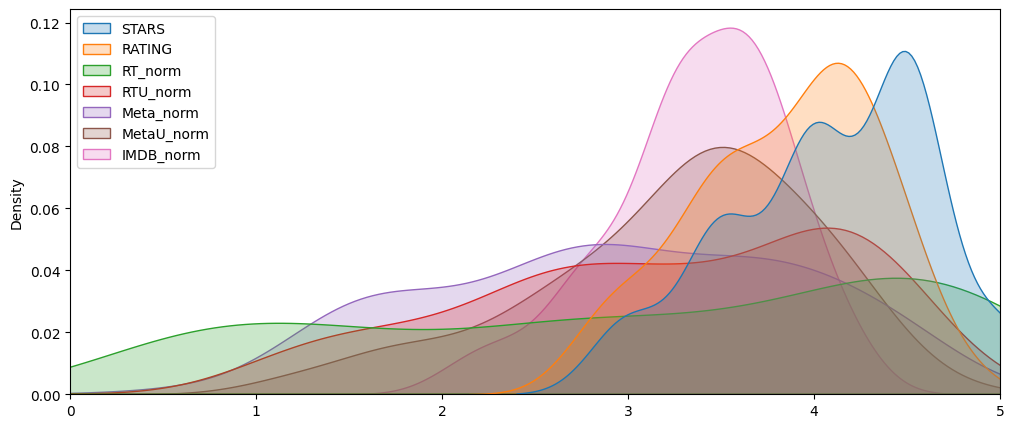

In [39]:
plt.figure(figsize=(12,5))
ax = sns.kdeplot(data=norm_scores, fill=True)
plt.xlim(0,5)
sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1), ncol=1, title_fontsize=14)

**Мы сразу видим, что рейтинги Fandango очень сдвинуты справо. Интересно также, что рейтинги RT от критиков имеют очень пологое распределение. Давайте сравним только эти два распределения.** 

**График KDE plot, сравнивающий распределение рейтингов Rotten Tomatoes от критиков и распределение рейтингов STARS от Fandango.**

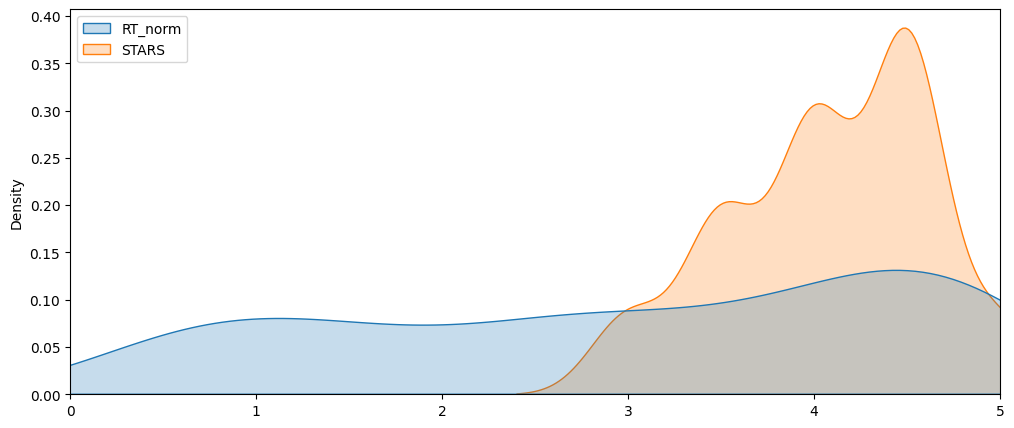

In [40]:
plt.figure(figsize=(12,5))
ax = sns.kdeplot(data=norm_scores[['RT_norm', 'STARS']], fill=True)
plt.xlim(0,5)
sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1), ncol=1, title_fontsize=14)

**График histplot, сравнивающий все нормализованные рейтинги:**

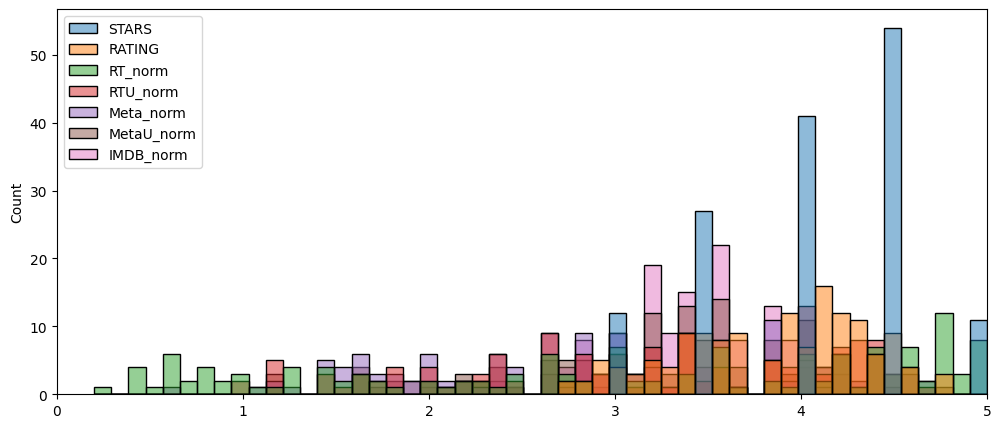

In [41]:
plt.figure(figsize=(12,5))
ax = sns.histplot(data=norm_scores, bins=52)
plt.xlim(0,5)
sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1), ncol=1, title_fontsize=14)

**Мы видели, что рейтинги Fandango явно выше рейтингов других компаний, особенно если смотреть на округлённые вверх значения рейтингов. Давайте посмотрим на 10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic :**

In [42]:
worst_films = norm_scores.sort_values('RT_norm').iloc[0:10]
worst_films

,FILM,STARS,RATING,RT_norm,RTU_norm,Meta_norm,MetaU_norm,IMDB_norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
109,The Vatican Tapes (2015),3.0,2.9,0.6,1.0,1.8,2.7,2.3
88,The Loft (2015),4.0,3.6,0.6,2.0,1.2,1.2,3.2
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8


**Визуализация распределение рейтингов от всех компаний для 10 фильмов с наихудшими рейтингами:**

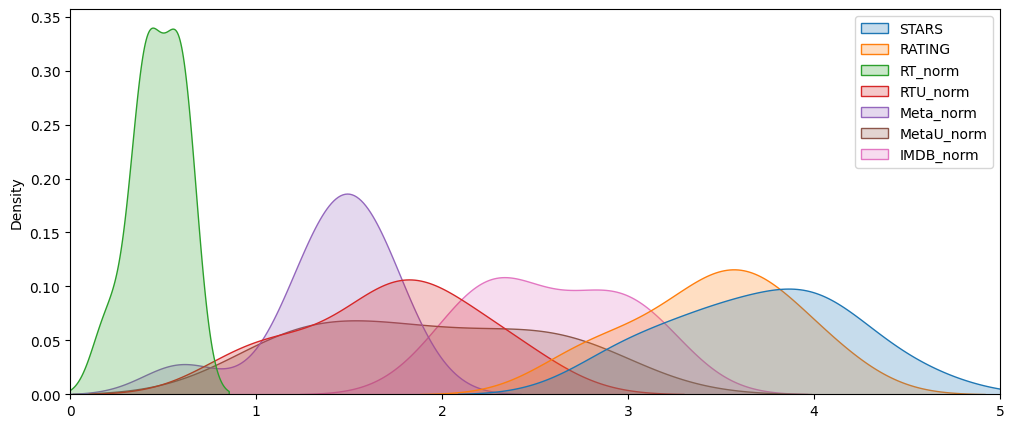

In [43]:
plt.figure(figsize=(12,5))
ax = sns.kdeplot(data=worst_films, fill=True)
plt.xlim(0,5)
sns.move_legend(ax, "upper right", bbox_to_anchor=(1, 1), ncol=1, title_fontsize=14)